### In this lesson you started looking at a dataset around bees and their honey production over a period of time that saw losses in the bee colony population overall. Dig deeper into this dataset and build a notebook that can tell the story of the health of the bee population, state by state and year by year. Do you discover anything interesting about this dataset?

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../../data/honey.csv")

print(df.head())

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


In [ ]:
print(df.columns)
print(df.info())

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB
None


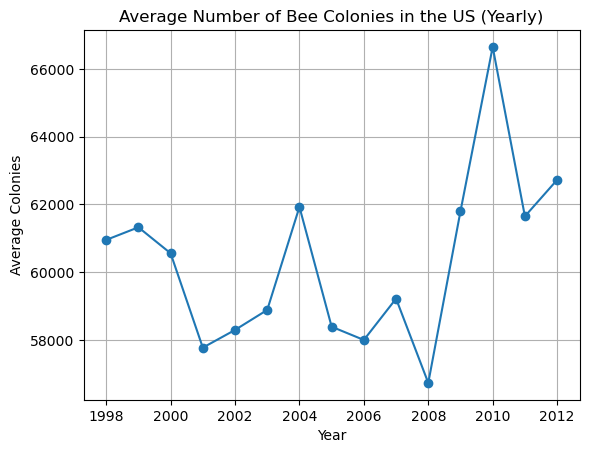

In [ ]:
# Average colonies per year across all states
national = df.groupby("year")["numcol"].mean()

plt.plot(national.index, national.values, marker="o")
plt.title("Average Number of Bee Colonies in the US (Yearly)")
plt.xlabel("Year")
plt.ylabel("Average Colonies")
plt.grid(True)
plt.show()

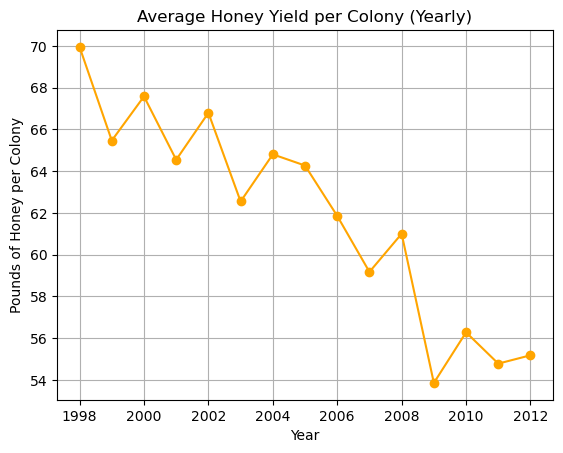

In [ ]:
yield_trend = df.groupby("year")["yieldpercol"].mean()

plt.plot(yield_trend.index, yield_trend.values, color="orange", marker="o")
plt.title("Average Honey Yield per Colony (Yearly)")
plt.xlabel("Year")
plt.ylabel("Pounds of Honey per Colony")
plt.grid(True)
plt.show()

Declining yield per colony suggests weaker bee health or environmental stress.

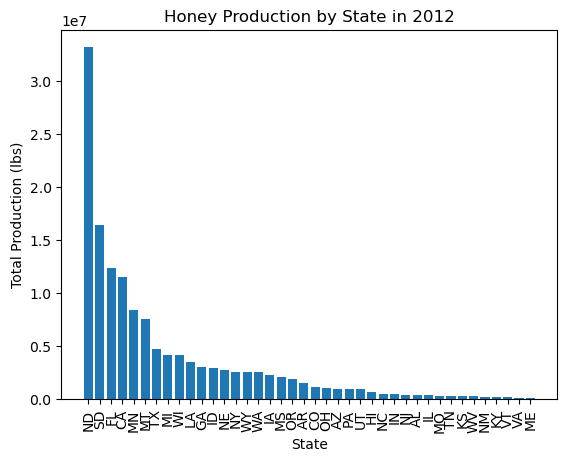

In [ ]:
latest_year = df["year"].max()
state_prod = df[df["year"]==latest_year].sort_values("totalprod", ascending=False)

plt.bar(state_prod["state"], state_prod["totalprod"])
plt.xticks(rotation=90)
plt.title(f"Honey Production by State in {latest_year}")
plt.xlabel("State")
plt.ylabel("Total Production (lbs)")
plt.show()

This highlights *North Dakota* produce the most honey in the most recent year.